# Exploring the data

https://www.kaggle.com/c/shelter-animal-outcomes/data

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import seaborn as sns
import sklearn

Read in `training.csv`, examine the columns

In [2]:
train = pd.read_csv('train.csv')
print 'Number of training observations:', len(train.index)
train.head()

Number of training observations: 26729


,AnimalID,Name,DateTime,OutcomeType,OutcomeSubtype,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color
0,A671945,Hambone,2014-02-12 18:22:00,Return_to_owner,NaN,Dog,Neutered Male,1 year,Shetland Sheepdog Mix,Brown/White
1,A656520,Emily,2013-10-13 12:44:00,Euthanasia,Suffering,Cat,Spayed Female,1 year,Domestic Shorthair Mix,Cream Tabby
2,A686464,Pearce,2015-01-31 12:28:00,Adoption,Foster,Dog,Neutered Male,2 years,Pit Bull Mix,Blue/White
3,A683430,NaN,2014-07-11 19:09:00,Transfer,Partner,Cat,Intact Male,3 weeks,Domestic Shorthair Mix,Blue Cream
4,A667013,NaN,2013-11-15 12:52:00,Transfer,Partner,Dog,Neutered Male,2 years,Lhasa Apso/Miniature Poodle,Tan


Missing values by column

In [3]:
train.isnull().sum()

AnimalID              0
Name               7691
DateTime              0
OutcomeType           0
OutcomeSubtype    13612
AnimalType            0
SexuponOutcome        1
AgeuponOutcome       18
Breed                 0
Color                 0
dtype: int64

## Examining the dependent variable, `OutcomeType`

`OutcomeType`

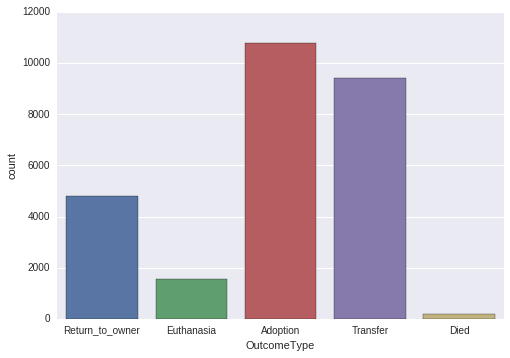

In [4]:
sns.countplot(x = "OutcomeType", data = train)

What are the possible `OutcomeSubtype`s for each `OutcomeType`?

In [5]:
train.groupby(['OutcomeType', 'OutcomeSubtype']).agg(['count'])

AnimalID  Name DateTime AnimalType  \
                                   count count    count      count   
OutcomeType OutcomeSubtype                                           
Adoption    Barn                       1     0        1          1   
            Foster                  1800  1542     1800       1800   
            Offsite                  165   132      165        165   
Died        At Vet                     4     3        4          4   
            Enroute                    8     1        8          8   
            In Foster                 52    29       52         52   
            In Kennel                114    35      114        114   
            In Surgery                 3     2        3          3   
Euthanasia  Aggressive               320   278      320        320   
            Behavior                  86    74       86         86   
            Court/Investigation        6     6        6          6   
            Medical                   66    38       66         66   
            Rabies Risk               74    43       74         74   
            Suffering               1002   301     1002       1002   
Transfer    Barn                       1     1        1          1   
            Partner                 7816  4436     7816       7816   
            SCRP                    1599    58     1599       1599   

                                SexuponOutcome AgeuponOutcome Breed Color  
                                         count          count count count  
OutcomeType OutcomeSubtype                                                 
Adoption    Barn                             1              1     1     1  
            Foster                        1800           1800  1800  1800  
            Offsite                        165            165   165   165  
Died        At Vet                           4              4     4     4  
            Enroute                          8              8     8     8  
            In Foster                       52             52    52    52  
            In Kennel                      114            114   114   114  
            In Surgery                       3              3     3     3  
Euthanasia  Aggressive                     320            320   320   320  
            Behavior                        86             86    86    86  
            Court/Investigation              6              6     6     6  
            Medical                         66             66    66    66  
            Rabies Risk                     74             74    74    74  
            Suffering                     1002           1000  1002  1002  
Transfer    Barn                             1              1     1     1  
            Partner                       7816           7816  7816  7816  
            SCRP                          1599           1583  1599  1599

## Examining the independent variables

`AnimalType`

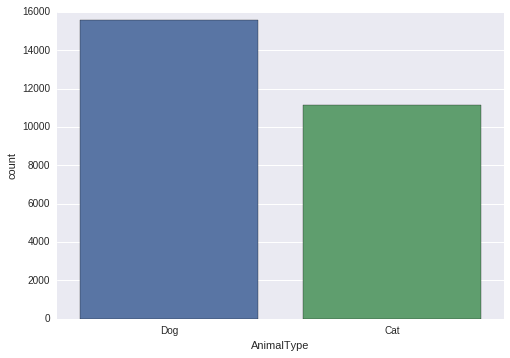

In [6]:
sns.countplot(x = "AnimalType", data = train)

`OutcomeType` by `AnimalType`

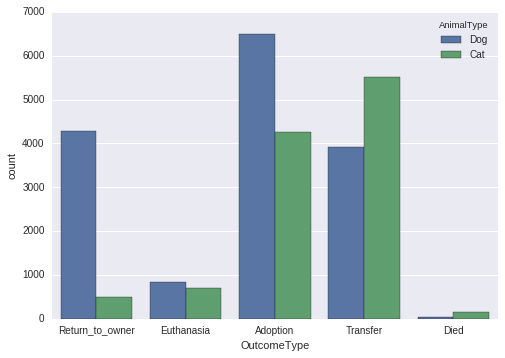

In [7]:
sns.countplot(x = "OutcomeType", hue = "AnimalType", data = train)

## Feature Engineering

Turning `SexuponOutcome` into two variables:
* Sex - Male / Female
* NeuturedSprayed - True / False

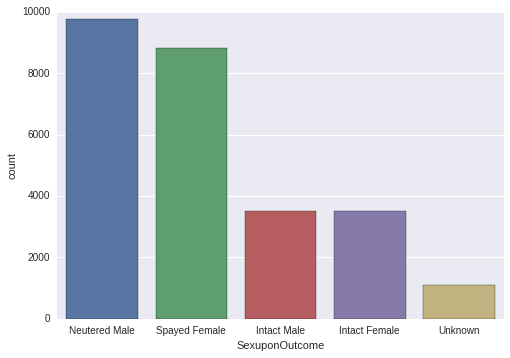

In [8]:
sns.countplot(x = "SexuponOutcome", data = train)

In [ ]:
def create_sex(mylist):
    results = []
    for x in mylist:
        x = x.split(' ')
        if len(x) == 1:
            results.append('Unknown')
        else:
            results.append(x[1])
    return results

In [ ]:
create_sex(list(train['SexuponOutcome']))

`AgeuponOutcome` should be transformed into a numerical variable

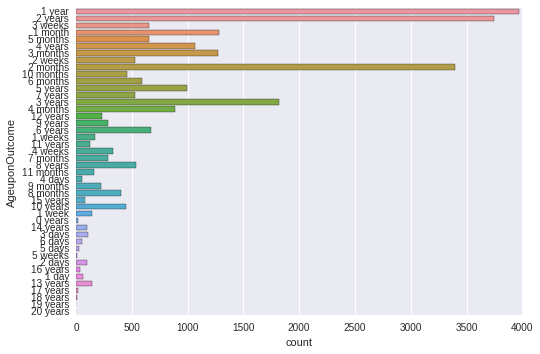

In [9]:
sns.countplot(y = "AgeuponOutcome", data = train)

In [11]:
ages = list(train['AgeuponOutcome'])
ages[:5]

['1 year', '1 year', '2 years', '3 weeks', '2 years']

In [14]:
def create_age_in_years(ages):
    """
    Transform age in years/months/weeks into years
    """
    results = []
    for age in ages:
        print age
        duration, unit = age.split(' ')
        duration = float(duration)
        if unit == 'weeks':
            results.append(duration / 52)
        elif unit == 'months':
            results.append(duration / 52)
        else:
            results.append(duration)
    return results

In [15]:
create_age_in_years(ages)

1 year
1 year
2 years
3 weeks
2 years
1 month
3 weeks
3 weeks
5 months
1 year
2 years
2 years
4 years
2 years
1 year
3 months
3 weeks
2 weeks
2 years
1 year
2 months
1 year
2 years
10 months
2 months
1 month
6 months
5 years
2 months
7 years
3 years
4 months
2 months
5 years
3 years
3 years
3 years
2 months
4 months
3 weeks
7 years
2 months
2 months
4 years
2 years
12 years
9 years
3 weeks
5 months
6 years
1 year
3 months
3 weeks
2 years
2 months
1 weeks
2 months
1 year
4 years
2 years
1 year
11 years
1 month
2 years
2 weeks
6 years
6 months
2 months
2 months
1 year
2 months
2 years
3 years
1 year
4 years
2 years
3 months
1 year
2 months
2 years
1 year
2 weeks
4 weeks
2 years
12 years
1 year
2 months
2 weeks
3 months
3 months
5 months
3 years
7 years
2 years
4 months
9 years
7 months
2 months
3 years
3 years
5 years
5 years
2 weeks
2 weeks
4 years
4 years
2 months
2 years
2 years
9 years
5 years
1 year
2 years
3 weeks
5 months
6 years
1 year
3 months
1 month
3 years
5 years
8 years
2 m

AttributeError: 'float' object has no attribute 'split'